# HackerEarth Machine Learning challenge: Adopt a buddy

## Problem statement
**Having a pet is one of life’s most fulfilling experiences. Your pets spoil you with their love, compassion and loyalty. And dare anyone lay a finger on you in your pet’s presence, they are in for a lot of trouble. Thanks to social media, videos of clumsy and fussy (yet adorable) pets from across the globe entertain you all day long. Their love is pure and infinite. So, in return, all pets deserve a warm and loving family, indeed. And occasional boops, of course.**

**Numerous organizations across the world provide shelter to all homeless animals until they are adopted into a new home. However, finding a loving family for them can be a daunting task at times.  This International Homeless Animals Day, we present a Machine Learning challenge to you: Adopt a buddy.**

**The brighter side of the pandemic is an increase in animal adoption and fostering. To ensure that their customers stay indoors, a leading pet adoption agency plans on creating a virtual-tour experience, showcasing all animals available in their shelter. To enable that, you have been tasked to build a Machine Learning model that determines type and breed of the animal based on its physical attributes and other factors.**

## Dataset
**The dataset consists of parameters such as: a unique ID assigned to each animal that is up for adoption, date on which they arrived at the shelter, their physical attributes such as color, length and height, among other factors.**

**The benefits of practicing this problem by using Machine Learning techniques are as follows:**

* This challenge will encourage you to apply your Machine Learning skills to build models that classify images into multiple categories
* This challenge will help you to actively enhance your knowledge of multi-label classification. It is one of the basic building blocks of Machine Learning

**We challenge you to build a predictive model that detects the type and breed of an animal based on its condition, appearance, and other factors.**

**For more info visit https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-pet-adoption/**

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import RegressorChain
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample


## Load & Prepare Data

In [2]:
train_df = pd.read_csv("../input/adopt-a-buddy/train.csv")
test_df=pd.read_csv("../input/adopt-a-buddy/test.csv")


In [3]:
train_df.head()


,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [4]:
train_df.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [5]:
train_df.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [6]:
train_df.pet_category.unique()

array([1, 2, 4, 0])

In [7]:

#train_df['pet_category'].replace(4,3,inplace=True)

In [8]:
train_df.color_type.unique()

array(['Brown Tabby', 'White', 'Brown', 'Black', 'Red', 'Tricolor',
       'Calico', 'Brown Brindle', 'Blue', 'Tortie', 'Gray', 'Fawn',
       'Buff', 'Torbie', 'Orange Tabby', 'Sable', 'Tan', 'Blue Tick',
       'Orange', 'Blue Tabby', 'Chocolate', 'Black Tabby',
       'Black Brindle', 'Cream Tabby', 'Gold', 'Calico Point',
       'Blue Merle', 'Red Merle', 'Yellow', 'Lynx Point', 'Blue Cream',
       'Flame Point', 'Cream', 'Yellow Brindle', 'Blue Tiger',
       'Seal Point', 'Red Tick', 'Brown Merle', 'Black Smoke',
       'Gray Tabby', 'Green', 'Tortie Point', 'Blue Smoke', 'Apricot',
       'Blue Point', 'Silver Tabby', 'Lilac Point', 'Silver',
       'Brown Tiger', 'Liver', 'Agouti', 'Chocolate Point', 'Liver Tick',
       'Pink', 'Black Tiger', 'Silver Lynx Point'], dtype=object)

In [9]:
train_df.pet_category.unique()

array([1, 2, 4, 0])

In [10]:
train_df.breed_category.unique()

array([0., 2., 1.])

In [11]:
train_df.breed_category=train_df.breed_category.astype(int)
# train_df.pet_category=train_df.pet_category.astype(str)
train_df.condition=train_df.condition.astype('Int64')


In [12]:
train_df.color_type = pd.Categorical(train_df.color_type)
train_df.color_type=train_df.color_type.cat.codes

In [13]:
test_df.color_type = pd.Categorical(test_df.color_type)
test_df.color_type=test_df.color_type.cat.codes

In [14]:
train_df.head()
#train_df.dtypes


,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2,18,0.80,7.78,13,9,0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1,53,0.72,14.19,13,9,0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,<NA>,15,0.15,40.90,15,4,2,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1,53,0.62,17.82,0,1,0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2,2,0.50,11.06,18,4,0,1


In [15]:
train_df.condition.unique()

<IntegerArray>
[2, 1, <NA>, 0]
Length: 4, dtype: Int64

In [16]:
##All NaN belongs to particular breed category
train_df[train_df['breed_category']==2].condition.isnull().sum()

1477

In [17]:
##All NaN belongs to particular breed category
train_df[train_df['breed_category']==2].condition.unique()

<IntegerArray>
[<NA>]
Length: 1, dtype: Int64

In [18]:
##Fill NaN values with 3 
train_df['condition'].fillna(3,inplace=True)
test_df['condition'].fillna(3,inplace=True)

In [19]:
train_df[train_df['breed_category']==2].condition.unique()

<IntegerArray>
[3]
Length: 1, dtype: Int64

In [20]:
train_df.breed_category=train_df.breed_category.astype(int)
# train_df.pet_category=train_df.pet_category.astype(str)
train_df.condition=train_df.condition.astype(int)
train_df.color_type=train_df.color_type.astype(int)


In [21]:
test_df.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,2,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,36,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,2,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,2,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,14,0.71,30.92,0,7


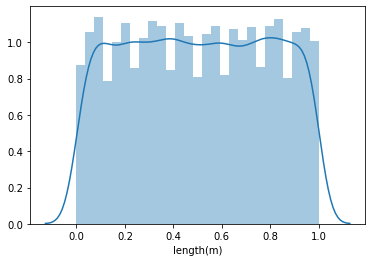

In [22]:
sns.distplot(train_df['length(m)'])

In [23]:
print(len(train_df[train_df['length(m)'] == 0]))
print(len(test_df[test_df['length(m)']==0]))

93
44


In [24]:
train_df['length(cm)'] = train_df['length(m)'].apply(lambda x: x*100)
test_df['length(cm)'] = test_df['length(m)'].apply(lambda x: x*100)

In [25]:
train_df.drop('length(m)', axis=1, inplace=True)
test_df.drop('length(m)', axis=1, inplace=True)

In [26]:
train_df[train_df['length(cm)']==0].groupby(['length(cm)','pet_category']).size()

length(cm)  pet_category
0.0         1               35
            2               56
            4                2
dtype: int64

In [27]:
test_df['length(cm)'].mean()

50.72646184340932

In [28]:
val = train_df['length(cm)'].mean()
train_df['length(cm)'] = train_df['length(cm)'].replace(to_replace=0, value=val)
test_df['length(cm)'] = test_df['length(cm)'].replace(to_replace=0, value=val)

In [29]:
train_df[['length(cm)','height(cm)']].describe()

,length(cm),height(cm)
count,18834.000000,18834.000000
mean,50.511761,27.448832
std,28.652550,13.019781
min,1.000000,5.000000
25%,26.000000,16.172500
50%,50.263566,27.340000
75%,76.000000,38.890000
max,100.000000,50.000000


In [30]:
train_df['ratio_len_height'] = train_df['length(cm)']/train_df['height(cm)']

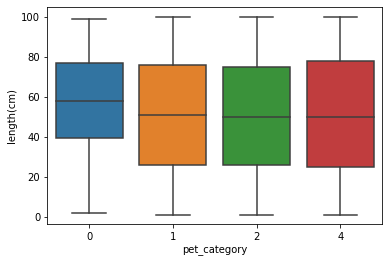

In [31]:
sns.boxplot(x='pet_category',y='length(cm)',data=train_df)

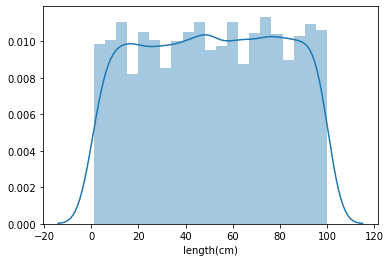

In [32]:
sns.distplot(test_df['length(cm)'])

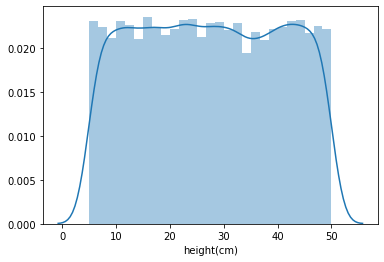

In [33]:
sns.distplot(train_df['height(cm)'])

In [34]:
print(train_df.groupby(['breed_category']).size())
print(train_df.groupby(['pet_category']).size())

breed_category
0    9000
1    8357
2    1477
dtype: int64
pet_category
0       88
1     7184
2    10621
4      941
dtype: int64


In [35]:
print(train_df.groupby(['breed_category','pet_category']).size())


breed_category  pet_category
0               0                 30
                1               3195
                2               5692
                4                 83
1               0                  7
                1               3406
                2               4869
                4                 75
2               0                 51
                1                583
                2                 60
                4                783
dtype: int64


## Correlation Plot

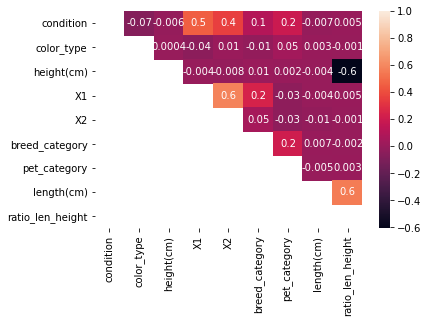

In [36]:
matrix=np.tril(train_df.corr())
sns.heatmap(train_df.corr(),annot=True,fmt='.1g' ,mask=matrix)

In [37]:
test_df

,pet_id,issue_date,listing_date,condition,color_type,height(cm),X1,X2,length(cm)
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,2,42.73,0,7,87.0
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,36,6.71,0,1,6.0
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,2,41.21,0,7,24.0
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,2,8.46,7,1,29.0
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,14,30.92,0,7,71.0
...,...,...,...,...,...,...,...,...,...
8067,ANSL_66809,2016-02-10 00:00:00,2017-03-10 14:56:00,2.0,14,36.08,13,9,82.0
8068,ANSL_59041,2015-12-07 00:00:00,2018-02-12 00:00:00,0.0,46,27.54,13,9,49.0
8069,ANSL_60034,2015-12-08 00:00:00,2017-01-04 17:19:00,0.0,2,37.19,0,7,98.0
8070,ANSL_58066,2016-06-28 00:00:00,2017-07-20 18:19:00,3.0,2,23.83,0,2,79.0


## Resample to deal with skewed data

In [38]:
# separate minority and majority classes
breedcat0 = train_df[train_df.breed_category==0]
breedcat1 = train_df[train_df.breed_category==1]
breedcat2= train_df[train_df.breed_category==2]

# upsample minority
pos_upsampled = resample(breedcat2,
 replace=True, # sample with replacement
 n_samples=len(breedcat1), # match number in majority class
 random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled_breed = pd.concat([breedcat0,breedcat1, pos_upsampled])
upsampled_breed.breed_category.value_counts()

0    9000
2    8357
1    8357
Name: breed_category, dtype: int64

In [39]:
# separate minority and majority classes
petcat0 = upsampled_breed[upsampled_breed.pet_category==0]
petcat1 = upsampled_breed[upsampled_breed.pet_category==1]
petcat2 = upsampled_breed[upsampled_breed.pet_category==2]
petcat4 = upsampled_breed[upsampled_breed.pet_category==4]


# upsample minority
pos_upsampled_0 = resample(petcat0,
 replace=True, # sample with replacement
 n_samples=len(petcat1), # match number in majority class
 random_state=27) # reproducible results
pos_upsampled_4 = resample(petcat4,
 replace=True, # sample with replacement
 n_samples=len(petcat1), # match number in majority class
 random_state=27) # reproducible results

# combine majority and upsampled minority
train_upsampled = pd.concat([pos_upsampled_0,petcat1, petcat2, petcat4])
train_upsampled.pet_category.value_counts()

2    10915
1     9956
0     9956
4     4502
Name: pet_category, dtype: int64

In [40]:
train_upsampled

,pet_id,issue_date,listing_date,condition,color_type,height(cm),X1,X2,breed_category,pet_category,length(cm),ratio_len_height
12026,ANSL_52992,2015-03-22 00:00:00,2017-04-19 18:57:00,2,7,43.11,7,1,0,0,74.0,1.716539
3731,ANSL_62949,2017-10-03 00:00:00,2018-11-01 18:10:00,3,40,34.78,7,1,2,0,67.0,1.926394
3731,ANSL_62949,2017-10-03 00:00:00,2018-11-01 18:10:00,3,40,34.78,7,1,2,0,67.0,1.926394
6487,ANSL_59435,2016-03-23 00:00:00,2017-04-22 17:37:00,2,53,30.43,11,4,1,0,46.0,1.511666
13155,ANSL_56221,2016-12-01 00:00:00,2017-12-22 13:26:00,3,30,22.13,0,7,2,0,99.0,4.473565
...,...,...,...,...,...,...,...,...,...,...,...,...
3038,ANSL_68705,2017-08-28 00:00:00,2018-09-19 08:38:00,3,30,46.22,15,4,2,4,95.0,2.055387
12681,ANSL_51954,2017-08-07 00:00:00,2018-08-31 18:28:00,3,30,44.21,18,4,2,4,20.0,0.452386
16036,ANSL_75743,2018-03-23 00:00:00,2019-04-13 08:54:00,3,2,15.50,15,4,2,4,17.0,1.096774
16448,ANSL_75370,2017-03-20 00:00:00,2019-04-07 18:30:00,3,30,5.86,15,4,2,4,99.0,16.894198


In [41]:
X_train=train_upsampled.iloc[:,[3,4,5,6,7,10]]
X_test=test_df.iloc[:,[3,4,5,6,7,8]]
y_train=train_upsampled.iloc[:,[8,9]]
y_train_cv=y_train["breed_category"]

In [42]:
X_train

,condition,color_type,height(cm),X1,X2,length(cm)
12026,2,7,43.11,7,1,74.0
3731,3,40,34.78,7,1,67.0
3731,3,40,34.78,7,1,67.0
6487,2,53,30.43,11,4,46.0
13155,3,30,22.13,0,7,99.0
...,...,...,...,...,...,...
3038,3,30,46.22,15,4,95.0
12681,3,30,44.21,18,4,20.0
16036,3,2,15.50,15,4,17.0
16448,3,30,5.86,15,4,99.0


## Train the XGBoost Model

In [43]:

# define base model
XGBmodel = XGBClassifier( 
                      learning_rate=0.01,  
                      colsample_bytree = 1,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=500, 
                      reg_alpha = 0.01,
                      max_depth=10, 
                      gamma=0)
#XGBmodel = XGBClassifier()
# define the direct multioutput wrapper model
wrapper=RegressorChain(XGBmodel)

wrapper.fit(X_train, y_train)

RegressorChain(base_estimator=XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.01,
                                            max_delta_step=None, max_depth=10,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob',
                                            random_st

In [44]:
X_train.color_type.unique()

array([ 7, 40, 53, 30,  2, 54, 15, 37, 32, 48, 52, 29, 18, 38, 20,  5, 26,
       12, 36, 28, 25, 44, 23, 11,  4, 10, 31, 50, 19, 47, 24, 21, 33, 46,
       49, 22,  8, 51, 45, 17, 39, 27, 43, 13,  3, 16,  9, 41, 14, 55, 42,
        1, 34,  0, 35,  6])

## Find the best Parameters using GridSearchCV

In [45]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),

}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch1 = GridSearchCV(estimator = XGBmodel, param_grid = param_test1, scoring='f1_micro',n_jobs=4, cv=5)
gsearch1.fit(X_train, y_train_cv)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None, colsample_bytree=1,
                                     gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=10, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob',
                                     random_state=None, reg_alpha=0.01,
                                     reg_lambda=None, scale_pos_weight=None,
             

In [46]:
 gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 1}, 0.9344167348239599)

In [47]:
# define base model
XGBmodel2 = XGBClassifier( 
                      learning_rate=0.01,
                        min_child_weight=1,
                      colsample_bytree = 1,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=500, 
                      reg_alpha = 0.01,
                      max_depth=5, 
                      gamma=0)

In [48]:
param_test2 = {
    'learning_rate':[0.01,0.1,0.05],
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch2 = GridSearchCV(estimator = XGBmodel2, param_grid = param_test2, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch2.fit(X_train, y_train_cv)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  1.4min remaining:   43.1s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  1.4min remaining:   21.6s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.9min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None, colsample_bytree=1,
                                     gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob',
                                     random_state=None, reg_alpha=0.01,
                                     reg_lambda=None, scale_pos_weight=None,
                 

In [49]:
 gsearch2.best_params_, gsearch2.best_score_

({'learning_rate': 0.01}, 0.9330864206433768)

In [50]:
XGBmodel3 = XGBClassifier( 
                      learning_rate=0.01,  
                      colsample_bytree = 1,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=500, 
                      reg_alpha = 0.01,
                      max_depth=10, 
                      gamma=0)

In [51]:
param_test3 = {
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch3 = GridSearchCV(estimator = XGBmodel3, param_grid = param_test3, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch3.fit(X_train, y_train_cv)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  3.7min remaining:   42.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.2min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None, colsample_bytree=1,
                                     gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=10, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob',
                                     random_state=None, reg_alpha=0.01,
                                     reg_lambda=None, scale_pos_weight=None,
             

In [52]:
 gsearch3.best_params_, gsearch3.best_score_

({'reg_alpha': 0}, 0.9311899992968933)

In [53]:
XGBmodel4 = XGBClassifier( 
                    learning_rate=0.01, 
                    min_child_weight=1,
                    colsample_bytree = 1,
                    subsample = 0.8,
                    objective='multi:softprob', 
                    n_estimators=500, 
                    reg_alpha = 0.01,
                    max_depth=5, 
                    gamma=0)

In [54]:
param_test4 = {
    'n_estimators':range(100,1000,100)
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch4 = GridSearchCV(estimator = XGBmodel4, param_grid = param_test4, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch4.fit(X_train, y_train_cv)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:  4.9min remaining:   13.7s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  5.2min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None, colsample_bytree=1,
                                     gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob',
                                     random_state=None, reg_alpha=0.01,
                                     reg_lambda=None, scale_pos_weight=None,
                 

In [55]:
gsearch4.best_params_, gsearch4.best_score_

({'n_estimators': 100}, 0.9364829554684985)

In [76]:
XGBmodelFinal = XGBClassifier( 
                    learning_rate=0.01, 
                    min_child_weight=1,
                    colsample_bytree = 1,
                    subsample = 0.8,
                    objective='multi:softprob', 
                    n_estimators=100, 
                    reg_alpha = 0,
                    max_depth=3, 
                    gamma=0)

In [77]:
wrapper=RegressorChain(XGBmodelFinal)

wrapper.fit(X_train, y_train)

RegressorChain(base_estimator=XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.01,
                                            max_delta_step=None, max_depth=3,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob',
                                            random_state=

## Predict Test Data

In [78]:
y_hat=wrapper.predict(X_test)

In [79]:
print('Predicted: %s' % y_hat)

Predicted: [[1. 2.]
 [0. 2.]
 [0. 2.]
 ...
 [1. 2.]
 [2. 0.]
 [1. 2.]]


In [80]:
print (np.mean((wrapper.predict(X_train) - y_train)**2, axis=0))  # 0.004, 0.003, 0.005

breed_category    0.064480
pet_category      0.893685
dtype: float64


## Create Prediction File

In [81]:
df_pred=pd.DataFrame(test_df.pet_id)

In [82]:
df_pred.head()

,pet_id
0,ANSL_75005
1,ANSL_76663
2,ANSL_58259
3,ANSL_67171
4,ANSL_72871


In [83]:
X_test

,condition,color_type,height(cm),X1,X2,length(cm)
0,0.0,2,42.73,0,7,87.0
1,1.0,36,6.71,0,1,6.0
2,1.0,2,41.21,0,7,24.0
3,1.0,2,8.46,7,1,29.0
4,1.0,14,30.92,0,7,71.0
...,...,...,...,...,...,...
8067,2.0,14,36.08,13,9,82.0
8068,0.0,46,27.54,13,9,49.0
8069,0.0,2,37.19,0,7,98.0
8070,3.0,2,23.83,0,2,79.0


In [84]:
test_df

,pet_id,issue_date,listing_date,condition,color_type,height(cm),X1,X2,length(cm)
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,2,42.73,0,7,87.0
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,36,6.71,0,1,6.0
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,2,41.21,0,7,24.0
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,2,8.46,7,1,29.0
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,14,30.92,0,7,71.0
...,...,...,...,...,...,...,...,...,...
8067,ANSL_66809,2016-02-10 00:00:00,2017-03-10 14:56:00,2.0,14,36.08,13,9,82.0
8068,ANSL_59041,2015-12-07 00:00:00,2018-02-12 00:00:00,0.0,46,27.54,13,9,49.0
8069,ANSL_60034,2015-12-08 00:00:00,2017-01-04 17:19:00,0.0,2,37.19,0,7,98.0
8070,ANSL_58066,2016-06-28 00:00:00,2017-07-20 18:19:00,3.0,2,23.83,0,2,79.0


In [85]:
pd.DataFrame(y_hat, index=df_pred.pet_id, columns=['breed_category','pet_category'], dtype=None, copy=False).to_csv('predictions4.csv')